you can find datasets in kaggle , check readme for datasets links . Also you can see these notebook from my kaggle page , you can find link in readme file

In [1]:
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
# libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Reading dataset 

In [26]:
# read dataset and take a quick glance
df=pd.read_csv("datasets/Global YouTube Statistics.csv",encoding='windows-1252')
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [27]:
df.columns # see all columns , we need to drop some columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

# Adjusting Dataset , drop columns , duplicates , data types , adding new columns

In [28]:
# Drop columns
df=df.loc[:,"rank":"created_year"]

In [29]:
df.head(3)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0


In [30]:
df.columns # now columns seems good , we can use all columns in different ways

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year'],
      dtype='object')

In [31]:
# see datatypes
df.dtypes # datatypes seems good , all numerical columns are in proper type

rank                                  int64
Youtuber                             object
subscribers                           int64
video views                         float64
category                             object
Title                                object
uploads                               int64
Country                              object
Abbreviation                         object
channel_type                         object
video_views_rank                    float64
country_rank                        float64
channel_type_rank                   float64
video_views_for_the_last_30_days    float64
lowest_monthly_earnings             float64
highest_monthly_earnings            float64
lowest_yearly_earnings              float64
highest_yearly_earnings             float64
subscribers_for_last_30_days        float64
created_year                        float64
dtype: object

check columns if there are wrong datas 

In [32]:
df["video views"].sort_values(ascending=True)  
# there are some 0 views channels , lets check one of them 

1      0.000000e+00
5      0.000000e+00
102    0.000000e+00
592    0.000000e+00
173    0.000000e+00
           ...     
6      9.324704e+10
15     1.010000e+11
4      1.480000e+11
3      1.640000e+11
0      2.280000e+11
Name: video views, Length: 995, dtype: float64

In [33]:
# check index 1
df.iloc[1]
# it seems YouTube Movies has 0 views but it is not True , i checked it
# we can drop o views

rank                                               2
Youtuber                              YouTube Movies
subscribers                                170000000
video views                                      0.0
category                            Film & Animation
Title                                  youtubemovies
uploads                                            1
Country                                United States
Abbreviation                                      US
channel_type                                   Games
video_views_rank                           4055159.0
country_rank                                  7670.0
channel_type_rank                             7423.0
video_views_for_the_last_30_days                12.0
lowest_monthly_earnings                          0.0
highest_monthly_earnings                        0.05
lowest_yearly_earnings                          0.04
highest_yearly_earnings                         0.58
subscribers_for_last_30_days                  

In [34]:
# drop 0 views
(df[df["video views"]==0]).index # this give us index list 
df=df.drop(axis=0,index=(df[df["video views"]==0]).index)

we can create new column that named 'highest yearly category' , we will do this with 'highest_yearly_earnings' column
For example if earning is more than 5000000 we will call this excellent if it is lower than 10000 we will call this poor
we can use this column in graphs , bars

In [35]:
income_list=[]  # income list
def earn_convert(num):
    income=""
    if num>5000000:
        income="Excellent"
    elif 1000000<num<5000000:
        income="very good"
    elif 500000<num<1000000:
        income="good"
    elif 100000<num<500000:
        income="normal"
    elif 10000<num<100000:
        income="bad"
    elif num<10000:
        income="poor"
    income_list.append(income)
    
df["highest_yearly_earnings"].map(earn_convert) # use map to interact with dataframes specific column
income_list[:6] # print first values to see everything is okey

['Excellent', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'very good']

In [36]:
df["highest yearly category"]=income_list  # assign new column 

In [37]:
df.tail(3) # check column is okey 

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,highest yearly category
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,867.0,1202.0,67035.0,17.0,268.0,201.0,3200.0,1000.0,2006.0,poor
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,4.0,69.0,3871000.0,968.0,15500.0,11600.0,185800.0,100000.0,2012.0,normal
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,125.0,44.0,24000000.0,6000.0,96000.0,72000.0,1200000.0,100000.0,2017.0,very good


# Plottings  : Graph , Bar , Scatter , Pie

In [38]:
df.head(3)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,highest yearly category
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,1.0,1.0,2.258000e+09,564600.0,9000000.0,6800000.0,108400000.0,2000000.0,2006.0,Excellent
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,1.0,1.0,1.348000e+09,337000.0,5400000.0,4000000.0,64700000.0,8000000.0,2012.0,Excellent
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,2.0,1.0,1.975000e+09,493800.0,7900000.0,5900000.0,94800000.0,1000000.0,2006.0,Excellent


* lets see how many channel created in yearly in plot and bar

In [39]:
# i will use column named 'created_year'
yearly_channel=df["created_year"].value_counts()
yearly_channel=yearly_channel.reset_index()
yearly_channel

,created_year,count
0,2014.0,98
1,2006.0,89
2,2011.0,82
3,2016.0,77
4,2015.0,72
5,2013.0,72
6,2012.0,68
7,2017.0,67
8,2009.0,52
9,2007.0,49


In [42]:
# now lets sort it by year in ascending order
yearly_channel=yearly_channel.sort_values(by="created_year",ascending=True) # yes , now years are in ascending order
yearly_channel.head(3)
# we have another problem there is a channel that created in 1975 , impossible , drop it

,created_year,count
18,1970.0,1
15,2005.0,24
1,2006.0,89


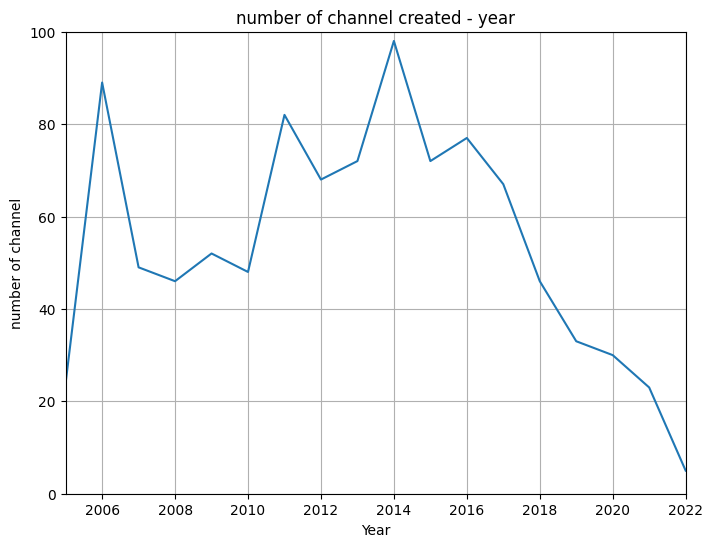

In [44]:
# Plot of channel number - year

x=yearly_channel["created_year"][1:] # dont include 1975
y=yearly_channel["count"][1:]

# lets set limit values to axis
plt.ylim(0,100)
plt.xlim(2005,2022)

# labels
plt.xlabel("Year")
plt.ylabel("number of channel")
plt.title("number of channel created - year")

plt.grid(True)

plt.plot(x,y)  # waw , 2014 is in top 

In [45]:
plt.rcParams["figure.figsize"] = (16,6)

Text(0.5, 1.0, 'number of channel created - year')

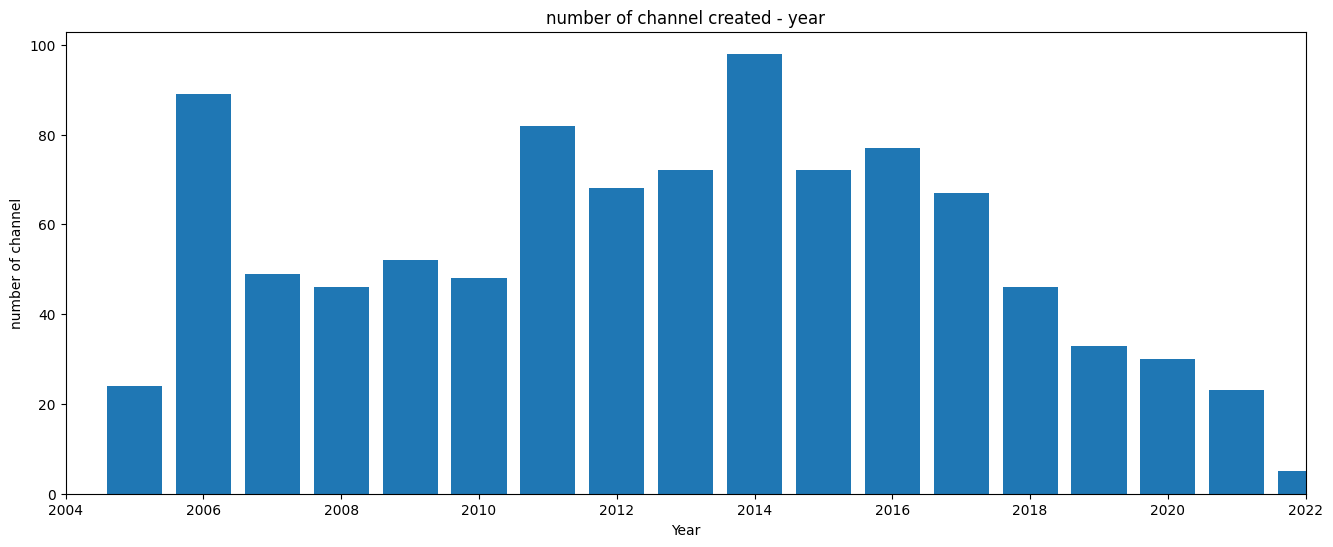

In [46]:
# Bar of channel number - year

plt.bar(x,y)
plt.xlim(2004,2022)

plt.xlabel("Year")
plt.ylabel("number of channel")
plt.title("number of channel created - year")

In [47]:
plt.rcParams["figure.figsize"] = (8,6)

* lets see total view - Subscriber connection with scatter plot

Text(0, 0.5, 'total views')

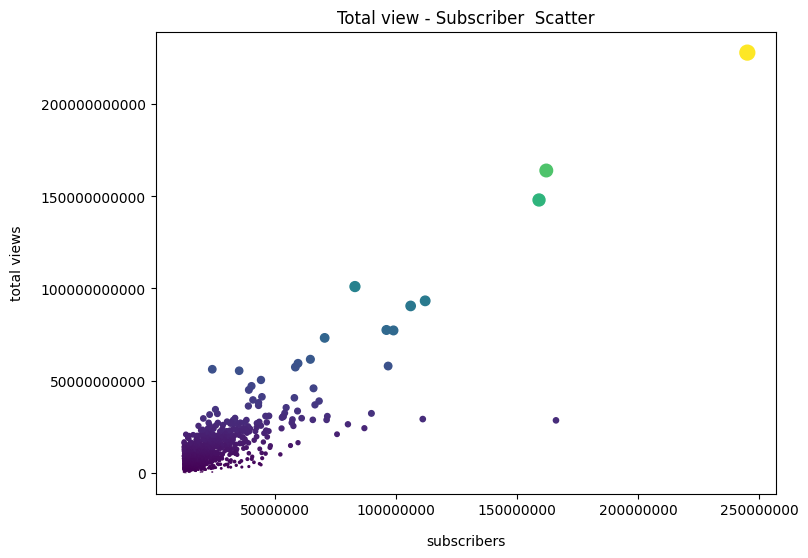

In [48]:
x=df["subscribers"]
y=df["video views"]

plt.scatter(x,y,s=y*0.0000000005,c=y*0.01) # s values represents size of circle : here i arange higher view has bigger circle , c value is color not that important now

plt.ticklabel_format(style='plain') # this line remove 'e' values (scientific notation)

# labels
plt.title("Total view - Subscriber  Scatter") # we can see there is a good connection between two column
plt.xlabel("subscribers",labelpad=12)
plt.ylabel("total views",labelpad=12)

now lets see channel type distributions in chart pie

In [49]:
channel_type=df["channel_type"].value_counts()
channel_type

channel_type
Entertainment    303
Music            215
People           101
Games             95
Comedy            51
Education         48
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

In [50]:
plt.rcParams["figure.figsize"] = (8,7) # adjust chart size for better visualization

Text(0.5, 1.0, 'Distribution of channels')

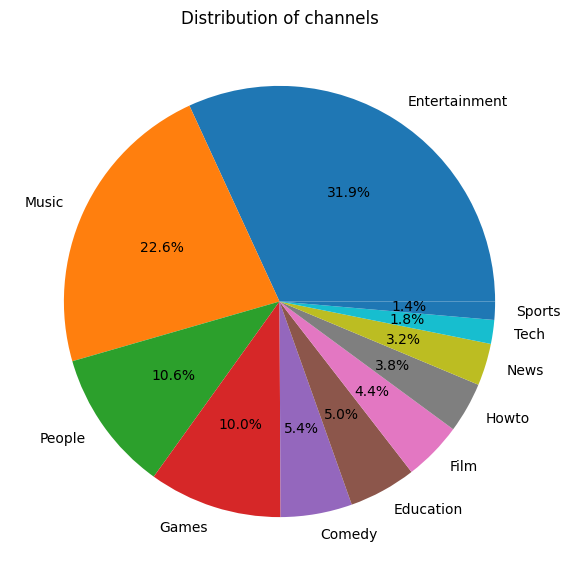

In [51]:
# i am not gonna use last 3 value because they are very small 
plt.pie(channel_type[:-3],labels=channel_type.index[:-3],autopct='%1.1f%%') # autopct='%1.1f%%' provides  percentage values to be on the top 
plt.title("Distribution of channels") 

* lets see count of channel created  in every country in bar
countries=df["Country"].value_counts()

In [52]:
countries=df["Country"].value_counts() # first 10 is good enough for us
countries


Country
United States           311
India                   168
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Australia                 9
Saudi Arabia              9
Ukraine                   8
United Arab Emirates      7
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Turkey                    4
Sweden                    4
Vietnam                   3
Jordan                    3
Netherlands               3
Singapore                 3
Chile                     3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
China                     1
Peru                      1
Andorra     

Text(0.5, 1.0, 'Channel Count - Country')

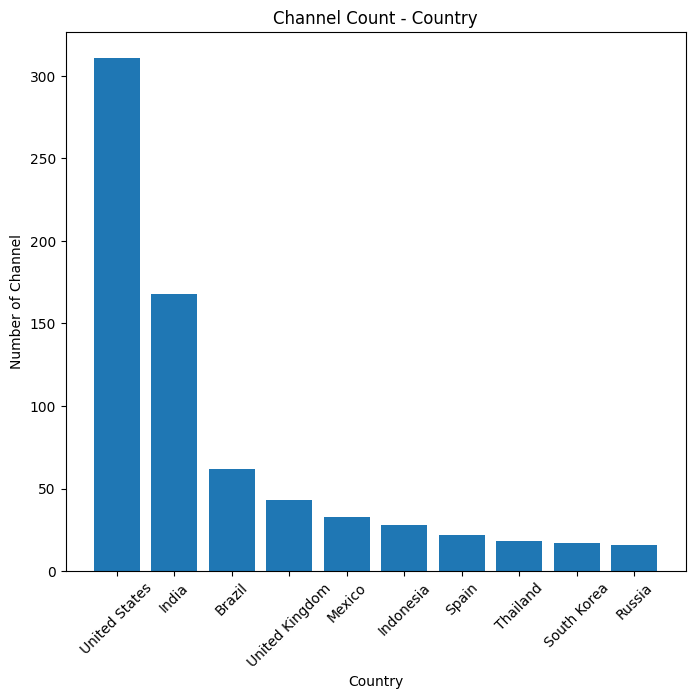

In [53]:
countries=countries[:10]

plt.bar(countries.index,countries)
plt.xlabel("Country")
plt.ylabel("Number of Channel")

plt.xticks(rotation=45) # rotate labels
plt.title("Channel Count - Country")

lets see video upload - total view connection in scatter plot

Text(0, 0.5, 'Total views(Million)')

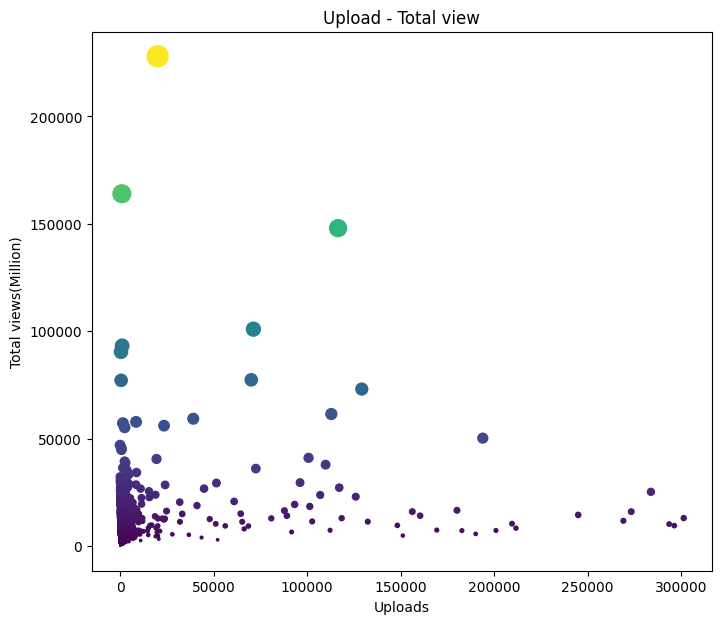

In [54]:
y1=df["video views"]/1000000 # divide it with MİLLİON
x1=df["uploads"]

plt.scatter(x1,y1,s=y1*0.001, c=0.001*y1)
 
plt.ticklabel_format(style='plain')

plt.title("Upload - Total view")
plt.xlabel("Uploads")
plt.ylabel("Total views(Million)")
 

* lets see total view by every country 

In [55]:
view_country=df.groupby(["Country"])["video views"].sum() # group by country and sum all views of that country
view_country.sort_values(ascending=False,inplace=True)

In [56]:
view_country.head(5) # it seems good

Country
United States     3.690292e+12
India             2.281048e+12
Brazil            4.812090e+11
United Kingdom    4.305665e+11
Thailand          2.643180e+11
Name: video views, dtype: float64

Text(0.5, 1.0, 'Country - Total View')

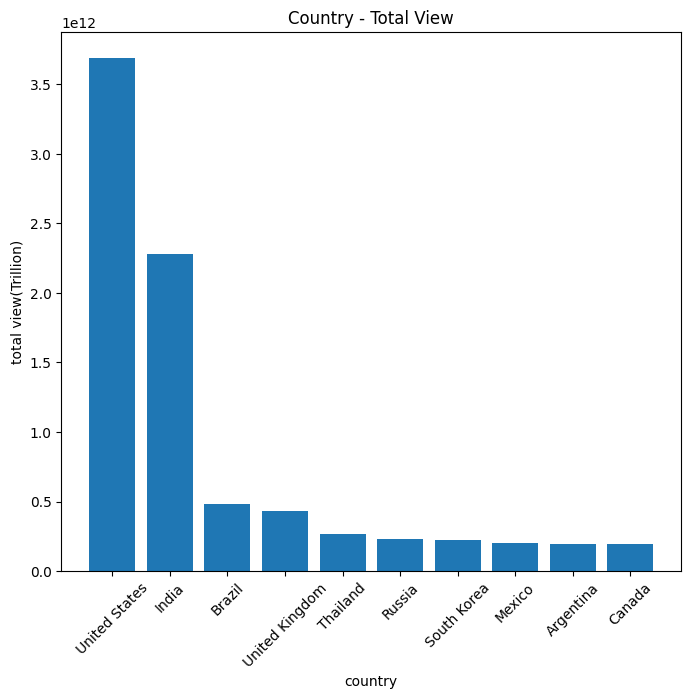

In [57]:
plt.bar(view_country.index[:10],view_country[:10])
plt.ylabel("total view(Trillion)")
plt.xlabel("country")
plt.xticks(rotation=45)
plt.title("Country - Total View")

* lets see  count of channel number of each category - total view of that category connection

In [58]:
# first find total views of categories
type_view=df.groupby(["channel_type"])["video views"].sum() # group by channel type and sum views
type_view.sort_values(ascending=False)

channel_type
Entertainment    3.371893e+12
Music            3.252736e+12
People           8.859191e+11
Education        7.648059e+11
Games            7.266072e+11
Film             4.592427e+11
Comedy           4.531406e+11
News             3.113528e+11
Howto            1.956506e+11
Sports           1.811050e+11
Tech             5.935554e+10
Animals          4.413526e+10
Autos            1.957755e+10
Nonprofit        1.086291e+10
Name: video views, dtype: float64

In [59]:
# channel count for each category
channel_type=df["channel_type"].value_counts()
channel_type

channel_type
Entertainment    303
Music            215
People           101
Games             95
Comedy            51
Education         48
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

you can see this two series index order is different we cant use them in same scatter
index order must be same , therefore we can merge them  after that we can use them

In [64]:
# merging
category_view_merged=pd.merge(channel_type, type_view, left_index=True, right_index=True)
category_view_merged=category_view_merged.reset_index() # now we can use it

In [65]:
category_view_merged

,channel_type,count,video views
0,Entertainment,303,3.371893e+12
1,Music,215,3.252736e+12
2,People,101,8.859191e+11
3,Games,95,7.266072e+11
4,Comedy,51,4.531406e+11
5,Education,48,7.648059e+11
6,Film,42,4.592427e+11
7,Howto,36,1.956506e+11
8,News,30,3.113528e+11
9,Tech,17,5.935554e+10
